In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import openpyxl

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import lightgbm as lgb

In [2]:
file_path = r"C:\Users\jiao_\Desktop\marketing_campaign.xlsx"
df = pd.read_excel(file_path)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data Preprocessing

In [5]:
#check for missing vlaues
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# remove the null value from the features using mean value
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
df['Income'].value_counts()

Income
52247.251354    24
7500.000000     12
35860.000000     4
37760.000000     3
83844.000000     3
                ..
40760.000000     1
41452.000000     1
6835.000000      1
33622.000000     1
52869.000000     1
Name: count, Length: 1975, dtype: int64

In [9]:
# # remove these two variables
df = df.drop(['Z_CostContact','Z_Revenue'], axis=1)

In [10]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Exploratory Data Analysis

In [13]:
# fetch age from Year_Birth

df.Year_Birth = pd.to_datetime(df['Year_Birth'], format='%Y')
year_now = datetime.date.today().year
df['Age'] = df['Year_Birth'].apply(lambda x: year_now - x.year)
df.drop('Year_Birth',axis=1, inplace=True)

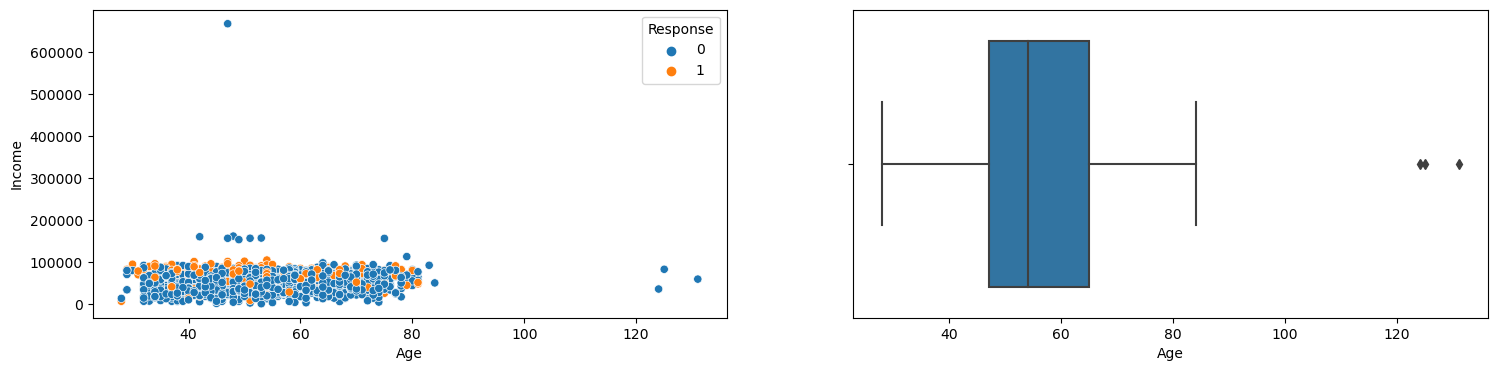

In [14]:
# Income spending by age
fig,ax = plt.subplots(1,2,figsize=(18,4))
sns.scatterplot(x='Age',y='Income',data=df, hue='Response',ax=ax[0])
sns.boxplot(x='Age',data=df,ax=ax[1])
plt.show()

Seems there are few outliers in Age as well as Income
Income for most of the population is under 100k
Most of the people in the dataset aged between 45-65

In [15]:
# calculate customers spending
df['spending'] = df.MntFishProducts+df.MntFruits+df.MntGoldProds+df.MntMeatProducts+df.MntSweetProducts+df.MntWines 

# dropping spending on each products
df.drop(['MntFishProducts','MntFruits','MntGoldProds','MntMeatProducts','MntSweetProducts','MntWines'],
        axis=1, inplace=True)

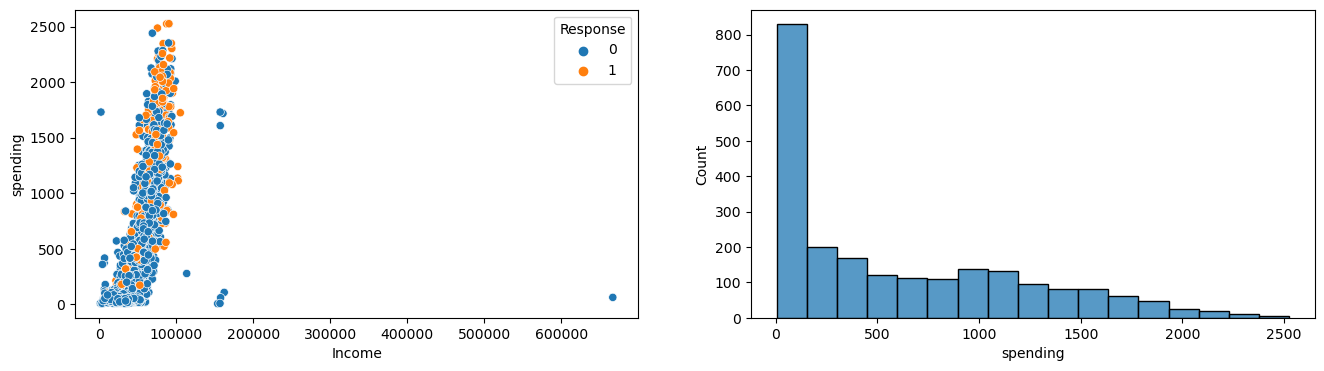

In [16]:
# Income and spending
fig,ax = plt.subplots(1,2,figsize=(16,4))
sns.scatterplot(x='Income',y='spending',data=df,hue='Response',ax=ax[0])
sns.histplot(df.spending,ax=ax[1])
plt.show()

Most of the people who responded have high spending
The number of people whose spending is less than 200 are high in numbers

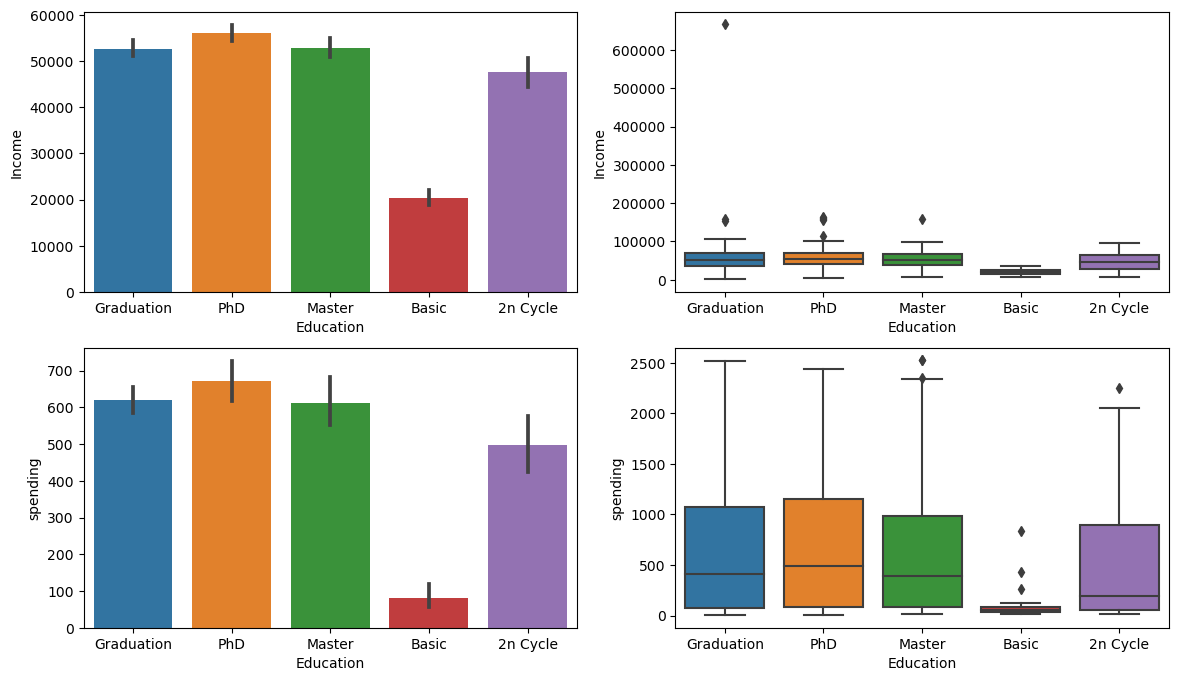

In [17]:
# Income and spending by education

fig,ax = plt.subplots(2,2,figsize=(14,8))
sns.barplot(x='Education',y='Income',data=df,ax=ax[0,0])
sns.boxplot(x='Education',y='Income',data=df,ax=ax[0,1])
sns.barplot(x='Education',y='spending',data=df,ax=ax[1,0])
sns.boxplot(x='Education',y='spending',data=df,ax=ax[1,1])
plt.show()

Graduate spending is higher according to their income ?

In [18]:
# convert the date of enrolment to datetime
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

# creating features from date of enrolment
df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_customer'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_customer'] = df['Dt_Customer'].apply(lambda x: x.day)

df = df.drop('Dt_Customer',axis=1)

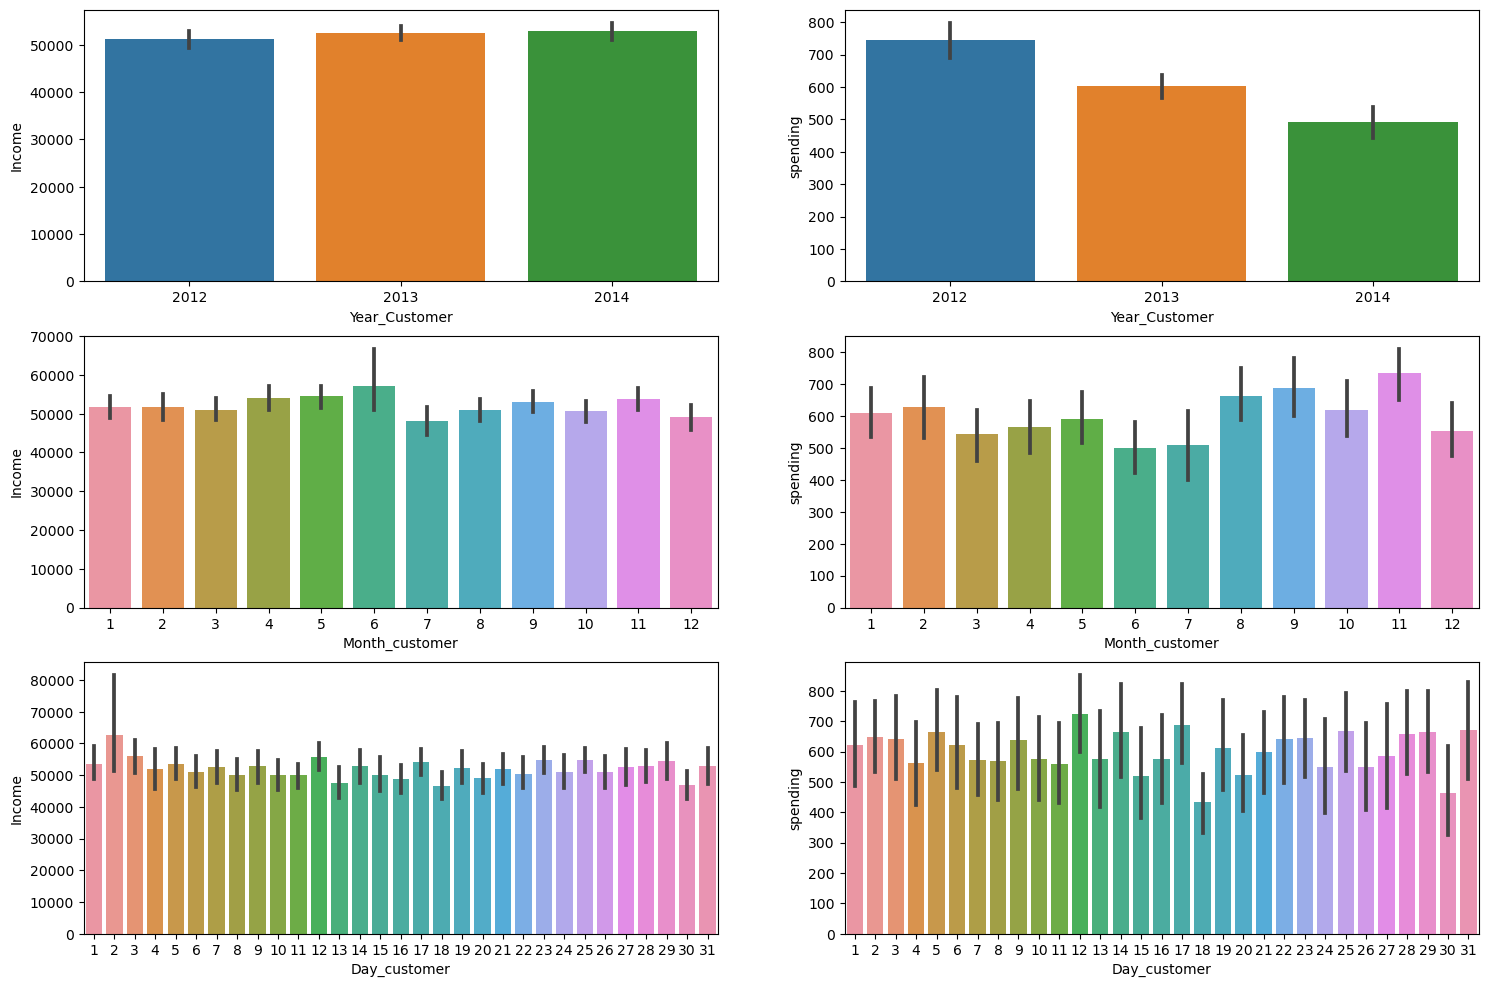

In [19]:
fig,ax = plt.subplots(3,2,figsize=(18,12))
sns.barplot(x='Year_Customer',y='Income',data=df,ax=ax[0,0])
sns.barplot(x='Year_Customer',y='spending',data=df,ax=ax[0,1])
sns.barplot(x='Month_customer',y='Income',data=df,ax=ax[1,0])
sns.barplot(x='Month_customer',y='spending',data=df,ax=ax[1,1])
sns.barplot(x='Day_customer',y='Income',data=df,ax=ax[2,0])
sns.barplot(x='Day_customer',y='spending',data=df,ax=ax[2,1])
plt.show()

Year over year the income has increased however the spending has decreases

In [20]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'spending',
       'Year_Customer', 'Month_customer', 'Day_customer'],
      dtype='object')

Label Encoding (transform data format)

In [21]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

Data Splitting

In [22]:
x = df.drop('Response', axis=1)
y = df.Response

# shape of X and y
print('Shape of x: ',x.shape)
print('Shape of y: ',y.shape)

Shape of x:  (2240, 23)
Shape of y:  (2240,)


Model Selection and Training

In [23]:
X_train, X_test,Y_train,Y_test = train_test_split(x, y, test_size =0.3, random_state=10)

In [24]:
print(X_train)

        ID  Education  Marital_Status        Income  Kidhome  Teenhome  \
808   2350          2               3  59666.000000        1         1   
1534  3745          0               3  23331.000000        1         0   
312   2437          2               3  52247.251354        0         0   
750   6974          4               5  83443.000000        0         0   
2167  3520          3               4  91172.000000        0         0   
...    ...        ...             ...           ...      ...       ...   
2009   832          4               5  65814.000000        0         1   
1180   359          2               5  48070.000000        0         1   
1344  5181          1               4  24367.000000        1         0   
527    713          3               3  50353.000000        0         0   
1289   378          2               3  52531.000000        0         0   

      Recency  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  ...  \
808        87                  7

In [25]:
model = XGBClassifier()

In [27]:
model.fit(X_train._get_numeric_data(), Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
pred = model.predict(X_test._get_numeric_data())

Model Evaluation

In [29]:
print('Accuracy Score: ', accuracy_score(pred, Y_test)*100)

Accuracy Score:  87.94642857142857


In [30]:
print('Precision Score: ', precision_score(pred, Y_test)*100)

Precision Score:  41.48936170212766


In [31]:
print('F1 Score: ', f1_score(pred, Y_test)*100)

F1 Score:  49.056603773584904


In [32]:
print('Recall Score: ', recall_score(pred, Y_test)*100)

Recall Score:  60.0


In [33]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       578
           1       0.60      0.41      0.49        94

    accuracy                           0.88       672
   macro avg       0.75      0.68      0.71       672
weighted avg       0.87      0.88      0.87       672



In [34]:
actual = [Y_test]  # Replace with your actual values
predicted1 = [pred]  # Replace with your predicted values

rmse = np.sqrt(np.mean((np.array(actual) - np.array(predicted1)) ** 2))
print("RMSE:", rmse)

RMSE: 0.3471825374147068


Confusion Matrix

In [35]:
cm = confusion_matrix(Y_test, pred)
cm

array([[552,  26],
       [ 55,  39]], dtype=int64)

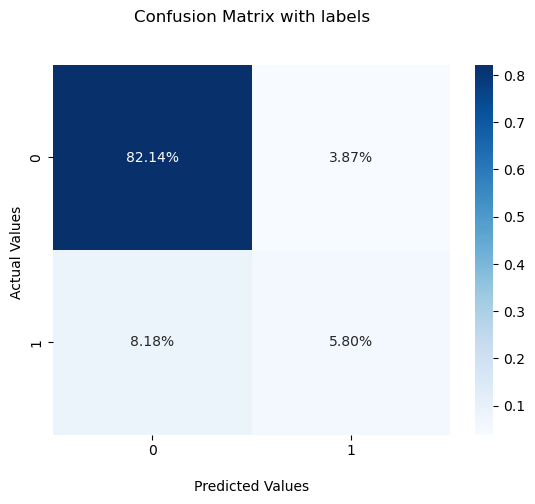

In [36]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

LightGBM

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   int32  
 2   Marital_Status       2240 non-null   int32  
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   NumDealsPurchases    2240 non-null   int64  
 8   NumWebPurchases      2240 non-null   int64  
 9   NumCatalogPurchases  2240 non-null   int64  
 10  NumStorePurchases    2240 non-null   int64  
 11  NumWebVisitsMonth    2240 non-null   int64  
 12  AcceptedCmp3         2240 non-null   int64  
 13  AcceptedCmp4         2240 non-null   int64  
 14  AcceptedCmp5         2240 non-null   int64  
 15  AcceptedCmp1         2240 non-null   i

In [39]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 240, number of negative: 1328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1061
[LightGBM] [Info] Number of data points in the train set: 1568, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153061 -> initscore=-1.710790
[LightGBM] [Info] Start training from score -1.710790


LGBMClassifier()

In [40]:
lgb_acc = lgb_model.score(X_test,Y_test)
lgb_acc

0.8809523809523809

In [41]:
y_pred_lgb = lgb_model.predict(X_test)
print(y_pred_lgb)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 

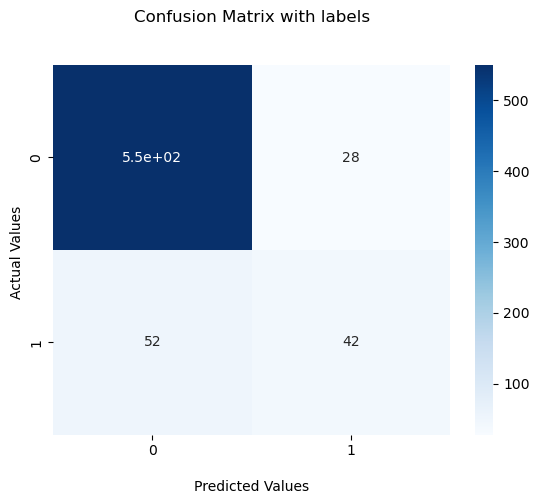

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_lgb)
cm

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [43]:
print('Accuracy Score: ', accuracy_score(y_pred_lgb, Y_test)*100)

Accuracy Score:  88.09523809523809


In [44]:
print('Precision Score: ', precision_score(y_pred_lgb, Y_test)*100)

Precision Score:  44.680851063829785


In [45]:
print('F1 Score: ', f1_score(y_pred_lgb, Y_test)*100)

F1 Score:  51.21951219512195


In [46]:
print('Recall Score: ', recall_score(y_pred_lgb, Y_test)*100)

Recall Score:  60.0


In [47]:
print(classification_report(y_pred_lgb, pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       602
           1       0.82      0.76      0.79        70

    accuracy                           0.96       672
   macro avg       0.89      0.87      0.88       672
weighted avg       0.96      0.96      0.96       672



LightGBM model has higher precision score than XGBoost model, 
it also has higher F1 score than XGBoost model, so I choose LightGBM model

In [48]:
actual = [Y_test]  # Replace with your actual values
predicted = [y_pred_lgb]  # Replace with your predicted values

rmse = np.sqrt(np.mean((np.array(actual) - np.array(predicted)) ** 2))
print("RMSE:", rmse)

RMSE: 0.3450327796711771


In [49]:
mean_response = sum(df['Response']) / len(df['Response'])
print("Mean Response Prediction:", mean_response)

Mean Response Prediction: 0.14910714285714285


In [50]:
response_frequency = df['Response'].value_counts()

print("Response Frequency:")
print(response_frequency)

Response Frequency:
Response
0    1906
1     334
Name: count, dtype: int64


In [51]:
import random

In [52]:
# Define the probabilities of response categories (0 and 1)
prob_no_response = 0.85  # Probability of no response (0)
prob_response = 0.15  # Probability of response (1)

# Generate random predictions based on the probabilities
num_predictions = 200  # Define the number of predictions to generate
random_predictions = [random.choices([0, 1], weights=[prob_no_response, prob_response])[0] for _ in range(num_predictions)]

print("Random Predictions:", random_predictions)

Random Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [53]:
# Calculate accuracy by comparing random predictions with true values
true_responses = df['Response'].tolist()
correct_predictions = sum(1 for pred, true in zip(random_predictions, true_responses) if pred == true)
accuracy = correct_predictions / len(true_responses)

print("Random Predictions:", random_predictions)
print("True Responses:", true_responses)
print("Accuracy of Random Predictions:", accuracy)

Random Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
True Responses: [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,